In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import shapefile as shp
from shapely.geometry import Point
sns.set_style('whitegrid')
import geopandas as gd

In [2]:
path = r"C:/Users/LENOVO/Documents/Diwali_Impact_coding/SpatialData/India_State_Shapefile/India_State_Boundary.shp"
gdf = gd.read_file(path)

In [48]:
df=pd.read_excel('Diwali2022_DataAllIndia.xlsx', sheet_name='Sheet1')

In [49]:
type(df)

pandas.core.frame.DataFrame

In [50]:
df

,State,City,Station,Diwali,NonDiwali,Lattitude,Longitude
0,Andhra Pradesh,Amaravati,SecretariatAmaravatiAPPCB_mean,51.651667,37.240305,16.504562,80.523517
1,Andhra Pradesh,Anantpur,GulzarpetAnantapurAPPCB_mean,87.503194,49.812762,14.675453,77.597760
2,Andhra Pradesh,Tirupati,TirumalaTirupatiAPPCB_mean,40.729167,35.085394,13.672900,79.351200
3,Andhra Pradesh,Vijayawada,PWDGroundsVijayawadaAPPCB_mean,NaN,NaN,16.506194,80.631355
4,Andhra Pradesh,Vishakhapatnam,GVMCorporationVisakhapatnamAPPCB_mean,87.719722,54.386504,17.686816,83.218482
...,...,...,...,...,...,...,...
269,Chattisgarh,Bilaspur,MangalaBilaspurNTPC_mean,48.544583,28.933241,22.097191,82.129388
270,Chattisgarh,Raipur,AIIMSRaipurCECB_mean,69.218125,88.231741,21.256961,81.579519
271,Chattisgarh,Raipur,BhatagaonNewISBTRaipurCECB_mean,NaN,63.493750,21.219304,81.631068
272,Chattisgarh,Raipur,KrishakNagarRaipurCECB_mean,44.094861,45.426951,21.165057,81.788857


In [5]:
lat = df['Lattitude'].tolist()      
long = df['Longitude'].tolist()

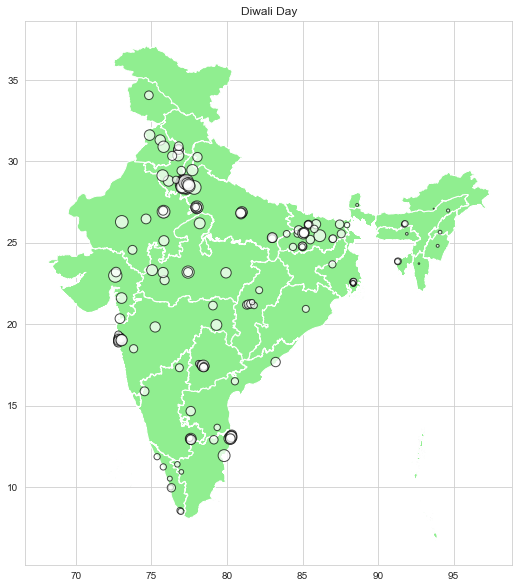

In [13]:
fig, ax = plt.subplots(figsize = (10,10))
gdf.to_crs(epsg=4326).plot(ax=ax, color='lightgreen' )
# geo_df.plot(column = 'Concentrations', ax=ax, cmap = 'rainbow',
#             legend = True, legend_kwds={'shrink': 0.3}, 
#             markersize = 15)

x, y = (df['Longitude'].values, df['Lattitude'].values)
ax.scatter('Longitude','Lattitude', color='r', alpha=0.7, fc = 'white' , ec = 'black', s='Diwali',data=df)

ax.set_title('Diwali Day')
plt.savefig('Heat Map')

In [57]:
lat = df['Lattitude'].tolist()      
long = df['Longitude'].tolist()

In [58]:
geometry = [Point(xy) for xy in zip(long,lat)]

In [59]:
geo_df = gpd.GeoDataFrame(df, 
                          crs = crs, 
                          geometry = geometry)

C:\Users\LENOVO\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


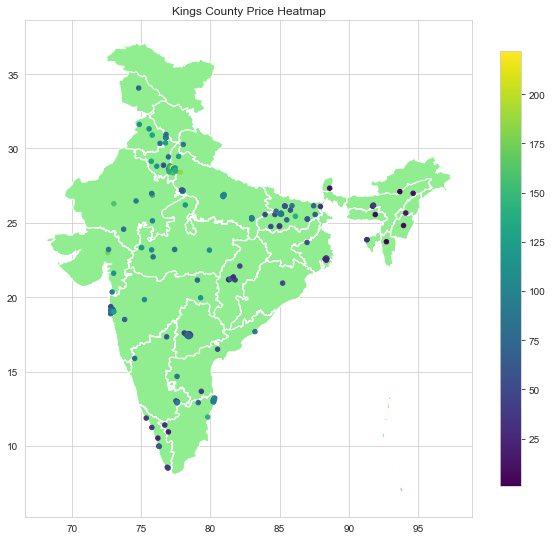

In [69]:
fig, ax = plt.subplots(figsize = (10,10))
gdf.to_crs(epsg=4326).plot(ax=ax, color='lightgreen')
geo_df.plot(column = 'Diwali', ax=ax, cmap = 'viridis',
            legend = True, legend_kwds={'shrink': 0.8}, 
            markersize = 20)
ax.set_title('Kings County Price Heatmap')
plt.savefig('Heat Map')